In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import pandas as pd
import datetime
now = datetime.datetime.now

In [2]:
#import creep data
creep_df = pd.read_csv('../PI_Data/PI_SS316_dataset.csv')
creep_df

,Material,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,...,B,N,Nb+Ta,Elongation,Reduction of Area,Stress,Temperature,Stacking Fault Energy,PI_creep_feature,creep_rupture_life
0,0,0.060,0.59,1.69,0.024,0.017,13.32,16.73,2.38,0.07,...,0.0010,0.0300,0.020,55,61,235,650,66.7612,1.4382,29.2
1,1,0.050,0.52,1.51,0.021,0.010,13.21,16.42,2.34,0.14,...,0.0005,0.0340,0.010,68,78,157,700,66.6025,1.4285,34.5
2,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,...,0.0008,0.0318,0.010,72,77,235,650,65.2279,1.4716,38.8
3,18,0.012,0.56,0.81,0.024,0.004,10.67,16.39,2.11,0.27,...,0.0010,0.0810,0.001,106,80,177,700,58.7002,1.5759,39.0
4,8,0.060,0.52,1.58,0.025,0.007,13.60,16.60,2.31,0.26,...,0.0007,0.0224,0.010,75,83,157,700,66.6248,1.5669,40.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,...,0.0008,0.0318,0.010,41,55,118,600,65.2279,5.1788,142185.9
613,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,...,0.0011,0.0250,0.010,26,39,108,600,66.6471,5.2890,152758.0
614,2,0.050,0.71,1.52,0.022,0.013,13.50,17.50,2.28,0.17,...,0.0013,0.0350,0.020,28,37,108,600,64.2349,5.2471,173814.3
615,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,...,0.0011,0.0250,0.010,25,23,41,700,66.6471,5.3538,178190.4


In [3]:
Log_Creep_Life = np.log10(creep_df['creep_rupture_life'])
creep_df['Log_Creep_Life'] = Log_Creep_Life
creep_df = creep_df.drop(columns = ['creep_rupture_life'])

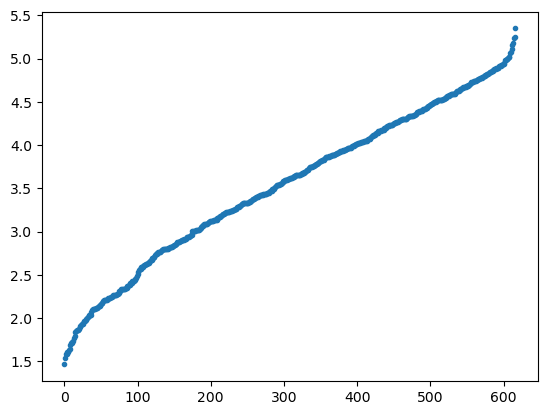

In [4]:
plt.plot(creep_df['Log_Creep_Life'], '.')

In [5]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Material               617 non-null    int64  
 1   C                      617 non-null    float64
 2   Si                     617 non-null    float64
 3   Mn                     617 non-null    float64
 4   P                      617 non-null    float64
 5   S                      617 non-null    float64
 6   Ni                     617 non-null    float64
 7   Cr                     617 non-null    float64
 8   Mo                     617 non-null    float64
 9   Cu                     617 non-null    float64
 10  Ti                     617 non-null    float64
 11  Al                     617 non-null    float64
 12  B                      617 non-null    float64
 13  N                      617 non-null    float64
 14  Nb+Ta                  617 non-null    float64
 15  Elonga

In [6]:
features = creep_df.iloc[:, 0:21]
targets = creep_df.iloc[:, 21]
features

,Material,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,...,Al,B,N,Nb+Ta,Elongation,Reduction of Area,Stress,Temperature,Stacking Fault Energy,PI_creep_feature
0,0,0.060,0.59,1.69,0.024,0.017,13.32,16.73,2.38,0.07,...,0.015,0.0010,0.0300,0.020,55,61,235,650,66.7612,1.4382
1,1,0.050,0.52,1.51,0.021,0.010,13.21,16.42,2.34,0.14,...,0.018,0.0005,0.0340,0.010,68,78,157,700,66.6025,1.4285
2,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,...,0.020,0.0008,0.0318,0.010,72,77,235,650,65.2279,1.4716
3,18,0.012,0.56,0.81,0.024,0.004,10.67,16.39,2.11,0.27,...,0.011,0.0010,0.0810,0.001,106,80,177,700,58.7002,1.5759
4,8,0.060,0.52,1.58,0.025,0.007,13.60,16.60,2.31,0.26,...,0.021,0.0007,0.0224,0.010,75,83,157,700,66.6248,1.5669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,...,0.020,0.0008,0.0318,0.010,41,55,118,600,65.2279,5.1788
613,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,...,0.017,0.0011,0.0250,0.010,26,39,108,600,66.6471,5.2890
614,2,0.050,0.71,1.52,0.022,0.013,13.50,17.50,2.28,0.17,...,0.027,0.0013,0.0350,0.020,28,37,108,600,64.2349,5.2471
615,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,...,0.017,0.0011,0.0250,0.010,25,23,41,700,66.6471,5.3538


In [7]:
# rmse loss
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

Run # 1 Fold # 1


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:22.063437


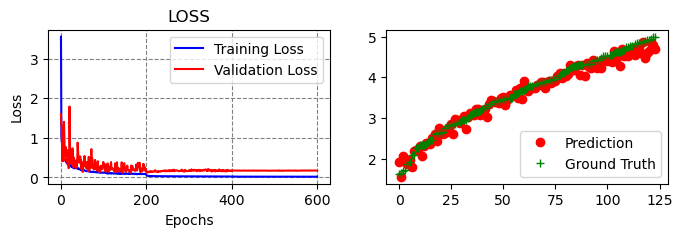

Pearson CC: 0.9908208239732785
R2 score: 0.9751839946096716
RMSE: 0.14037974394750186
MAE: 0.989075395176951
********************
Run # 1 Fold # 2


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:20.410219


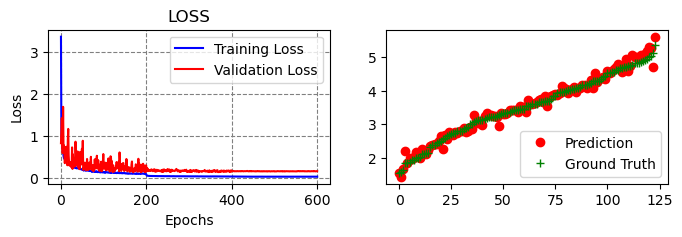

Pearson CC: 0.9921234501101586
R2 score: 0.9819621809479554
RMSE: 0.12457231571161885
MAE: 1.0790974516085103
********************
Run # 1 Fold # 3


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:19.508288


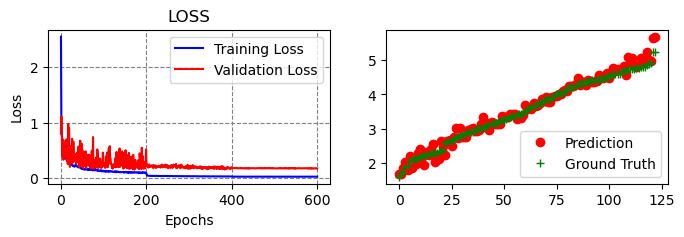

Pearson CC: 0.9911015646539207
R2 score: 0.9766580242240026
RMSE: 0.14350924605788282
MAE: 1.1096390078342646
********************
Run # 1 Fold # 4


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:19.238816


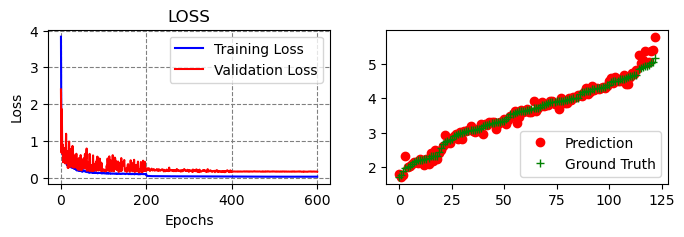

Pearson CC: 0.9905260031451928
R2 score: 0.9768941156286837
RMSE: 0.13108269097307032
MAE: 1.0126113295990409
********************
Run # 1 Fold # 5


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:19.307449


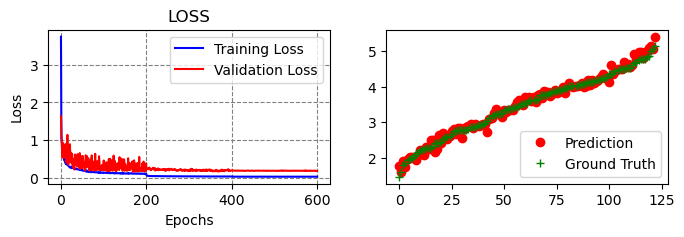

Pearson CC: 0.9932313059529809
R2 score: 0.9843207156987053
RMSE: 0.11009246486886887
MAE: 1.0248256750300662
********************


In [8]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=50+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            # define DNN
            model = Sequential()
            model.add(Input(shape=(21,)))
            model.add(Dense(1000,activation='relu'))
            model.add(Dense(200,activation='relu'))
            model.add(Dense(40,activation='relu'))
            model.add(Dense(1,activation='linear'))

            model.compile(optimizer= 'RMSprop', loss=root_mean_squared_error)

            # learning rate scheduler
            import math
            INITIAL_LEARNING_RATE = 0.01
            EPOCHS_NUM = 600
            def lr_step_decay(epoch, lr):
                drop_rate = 0.1
                epochs_drop = 200
                return INITIAL_LEARNING_RATE * math.pow(drop_rate, math.floor(epoch/epochs_drop))

            callbacks=[LearningRateScheduler(lr_step_decay, verbose=0)]

            # Fit model
            t = now()
            history = model.fit(x_train, y_train, batch_size=16, epochs=EPOCHS_NUM,
                                validation_split=0.2, verbose=0, callbacks=callbacks)
            print('Training time: %s' % (now() - t))

            # Plot the loss and the predictions
            train_loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochsn = np.arange(1, len(train_loss)+1,1)
            plt.figure(figsize=(8, 2))
            plt.subplot(1,2,1)
            plt.plot(epochsn,train_loss, 'b', label='Training Loss')
            plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
            plt.grid(color='gray', linestyle='--')
            plt.legend()
            plt.title('LOSS')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.subplot(1,2,2)
            y_pred_test = model.predict(x_test, verbose=0)
            plt.plot(y_pred_test, 'ro', label='Prediction')
            plt.plot(np.array(y_test), 'g+', label='Ground Truth')
            plt.legend(loc=4)
            plt.show()

            # Evaluate metrics
            PearsonCC[j, i] = pearsonr(y_test, np.squeeze(y_pred_test))[0]
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            RMSE[j, i] = np.sqrt(mean_squared_error(y_pred_test, y_test))
            MAE[j, i] = np.mean(abs(y_pred_test-np.array(y_test)))

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')

            print(20*'*')

In [9]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.990821,0.975184,0.140380,0.989075
1,0.992123,0.981962,0.124572,1.079097
2,0.991102,0.976658,0.143509,1.109639
3,0.990526,0.976894,0.131083,1.012611
4,0.993231,0.984321,0.110092,1.024826


In [10]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.991561,0.000994,0.979004,0.003509,0.129927,0.011976,1.04305,0.044509
